### PCA : 2D -> 1D (Iris Dataset)

In [26]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:20, :2]    # 앞부분 20개의 데이터만 사용(행 범위) + 길이와 너비 정보만 사용(컬럼 범위)

X
# 로딩 데이터 확인

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8]])

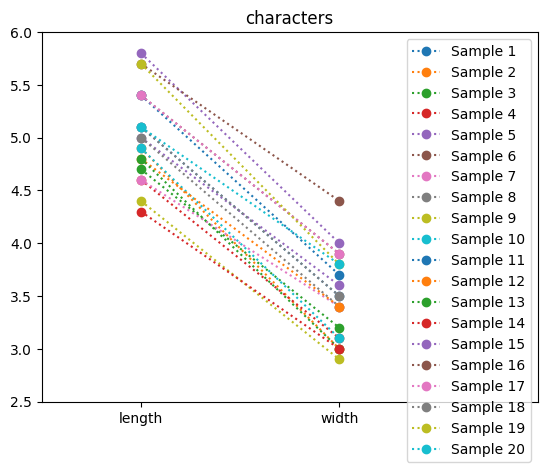

In [27]:
plt.plot(X.T, 'o:')
plt.xticks(range(0, 2), ["length", "width"])

plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)

plt.title("characters")
plt.legend(["Sample {}".format(i + 1) for i in range(20)])  # 20개의 데이터, 반복문으로 legend 처리

plt.show()
# 길이와 너비는 선형 비례하는 특성을 보인다.
# 즉, 차원 축소(1차원)로 표현 가능하다.

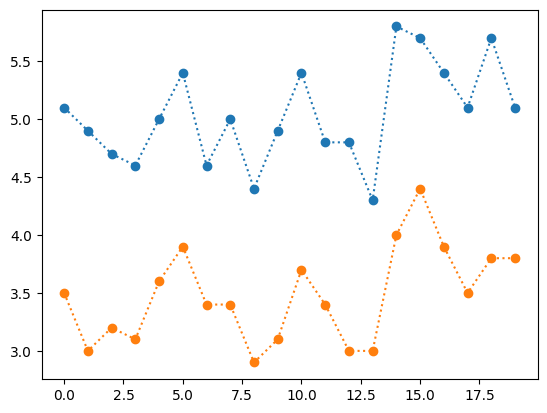

In [28]:
# plot 방식에 따라 데이터를 이해도가 달라질 수 있다.
# plt.plot(X.T, 'o:') 로 표현한 결과와 비교

plt.plot(X, 'o:')

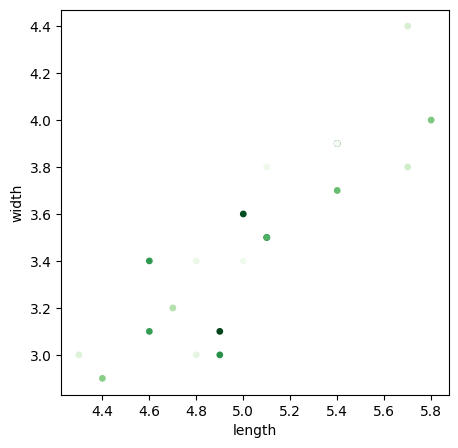

In [29]:
import pandas as pd
import numpy as np

n = len(X)
cmin, cmax = 0, 2
color = np.array([(cmax-cmin) * np.random.random_sample() + cmin for i in range(n)])  # 마커 색상 지정 방법

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(X[:, 0], X[:, 1], c=color, marker='o', s=15, cmap='Greens')

plt.xlabel("length")
plt.ylabel("width")
plt.axis("equal")   # x, y 축의 비율을 동일하게
plt.show()

In [30]:
# 주성분 분석 : 2D 표현된 데이터의 선형 비례 특성으로 인하여
# 1D로 단순히 길이 형태로 표현 가능함을 알 수 있다.

from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)     # 2D 데이터를 1D로 변환하는 pca1 객체 정의
X_low = pca1.fit_transform(X)  # 2D 데이터 X를 1D로 변환

x2 = pca1.inverse_transform(X_low)
# 1D로 변환된 데이터를 2D로 변경 -> PCA축 (3D의 경우 평면)위로 투영된 좌표값을 반환한다.

In [31]:
X_low

array([[ 0.06094287],
       [-0.42811209],
       [-0.4357636 ],
       [-0.5771332 ],
       [ 0.05711712],
       [ 0.5538236 ],
       [-0.37081743],
       [-0.08042673],
       [-0.8598724 ],
       [-0.35934017],
       [ 0.41627975],
       [-0.22562208],
       [-0.50070977],
       [-0.86369815],
       [ 0.91298622],
       [ 1.11547624],
       [ 0.5538236 ],
       [ 0.06094287],
       [ 0.7028447 ],
       [ 0.26725864]])

In [32]:
x2

array([[5.07924311, 3.52191159],
       [4.72420057, 3.18557908],
       [4.71864575, 3.18031699],
       [4.61601471, 3.0830944 ],
       [5.0764657 , 3.51928054],
       [5.43706306, 3.86087514],
       [4.76579516, 3.22498172],
       [4.97661207, 3.42468899],
       [4.41075262, 2.88864921],
       [4.77412739, 3.23287485],
       [5.33720942, 3.76628359],
       [4.87120362, 3.32483536],
       [4.67149634, 3.13565226],
       [4.40797522, 2.88601817],
       [5.69780678, 4.10787819],
       [5.84480983, 4.24713447],
       [5.43706306, 3.86087514],
       [5.07924311, 3.52191159],
       [5.54524892, 3.96335982],
       [5.22902356, 3.66379891]])

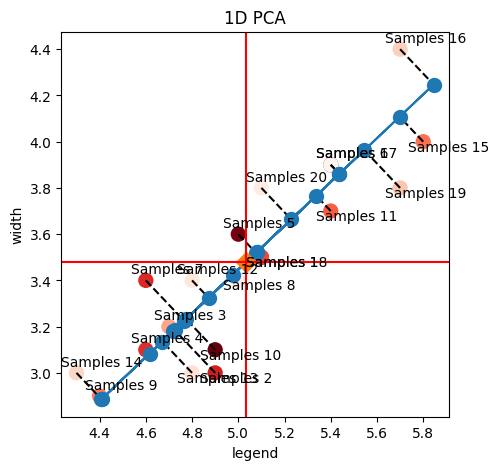

In [33]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(X[:,0], X[:, 1], c=color, marker='o', s=100, cmap='Reds')

for i in range(20):    # 데이터 갯수, 텍스트 마커를 일정한 위치에 표시하기 위해서
    d = 0.03 if X[i, 1] > x2[i, 1] else -0.04    # 원래 점이 투영된 점보다 위에 있는 경우 / 아래에 있는 경우 구분
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "Samples {}".format(i+1))

    # 변환된 값 X_low를 2D 평면에 동시에 plot하는 방법
    # pca1.inverse_transform 으로 역변환된 값과 원래 값 사이를 점선으로 1:1 연결
    plt.plot([X[i, 0], x2[i, 0]], [X[i, 1], x2[i, 1]], "k--")

# PCA의 역변환된 점을 plot
plt.plot(x2[:, 0], x2[:, 1], "o-", markersize=10)    # 파란색 점 + 라인

# 모든 점(원 데이터)의 중심값 (1개의 점)을 다이아몬드 마커로 표시
# 마커의 종류 : http://pyvisuall.tistory.com/113
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")  # 다이아몬드 마커

# 원 데이터의 각 축의 중간값을 빨간색으로 표시
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')

plt.grid(False)

plt.xlabel("legend")
plt.ylabel("width")
plt.title("1D PCA")
plt.axis("equal")

plt.show()

In [34]:
# PCA의 수학적 설명 : 선형대수학 부분 확인

# 데이터의 평균값
pca1.mean_

array([5.035, 3.48 ])

In [35]:
# 주성분 벡터 : 가장 근사 데이터를 만드는 단위 기저 벡터

pca1.components_

array([[0.72597676, 0.68771923]])

In [36]:
# 이 값은 평균을 제거한 특징행렬의 첫 번째 오른쪽 특이벡터
# 또는 그 행렬의 분산행렬의 첫 번째(가장 큰 고윳값에 대응하는) 고유벡터에 해당한다.
# 고유벡터의 부호 즉 방향은 반대가 될 수도 있다.

### 수학적 방법

In [37]:
# 중심점을 원점으로 하는 좌표값
X0 = X - X.mean(axis=0)

U, S, VT = np.linalg.svd(X0)
VT

array([[-0.72597676, -0.68771923],
       [-0.68771923,  0.72597676]])

In [38]:
# numpy로 오른쪽 특이벡터를 구하면 (0.68, 0.73) 임을 알 수 있다.

In [39]:
VT[:, 0]

array([-0.72597676, -0.68771923])

In [40]:
X[7, :]

# 7번째 특성 확인

array([5. , 3.4])

In [41]:
# 7번째 특성으로 주성분을 구하면
X_low[7]

array([-0.08042673])

In [43]:
# 7번째 특성으로 주성분 값을 구하는 수학적 방법
# 주성분 벡터 x (데이터 - 데이터 평균점) = 주성분 값

pca1.components_ @ (X[7, :] - pca1.mean_)

array([-0.08042673])

In [44]:
# 수학적인 방법으로 구한 값과 동일함

pca1.mean_    # 원 데이터의 각축의 평균값을 계산하는 방법

array([5.035, 3.48 ])

In [45]:
X.mean(axis=0)   # axis=0 : 열방향을 의미하므로 -> 각 축의 평균값을 계산

array([5.035, 3.48 ])

In [46]:
# 동일한 결과값을 출력하는 것 확인

In [47]:
# 주성분 값을 이용하여 주성분 축(또는 평면)에 투영되는 점을 구하면
x2[7, :]

array([4.97661207, 3.42468899])